### Time Series Forecasting for Superstores Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade xlrd

Requirement already up-to-date: xlrd in d:\anaconda\lib\site-packages (2.0.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
df1= pd.read_excel(r"C:/Users/Yash/Downloads/Superstore.xls")
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df1.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df1.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df1.describe

<bound method NDFrame.describe of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consume

In [8]:
set(df1['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

## Data Preprocessing

We shall first analyze the time series of Furniture Sales followed by other categories

In [9]:
furniture= df1.loc[df1['Category']=='Furniture']
print(furniture['Order Date'].min() )
furniture['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [10]:
cols = ['Row ID','Order ID','Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)

In [11]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [12]:
#furniture values
furniture.sort_values('Order Date')
furniture.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
furniture.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


## Indexing Time Series

In [14]:
furniture= furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [15]:
#AVeraging daily sales
y=furniture['Sales'].resample('MS').mean()
y['2016':]

Order Date
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

## Furniture Data Time Series Viualization

<AxesSubplot:xlabel='Order Date'>

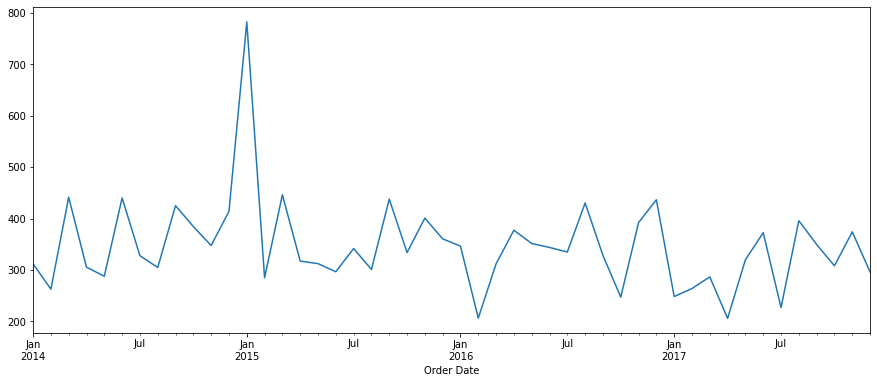

In [16]:
y.plot(figsize=(15,6))

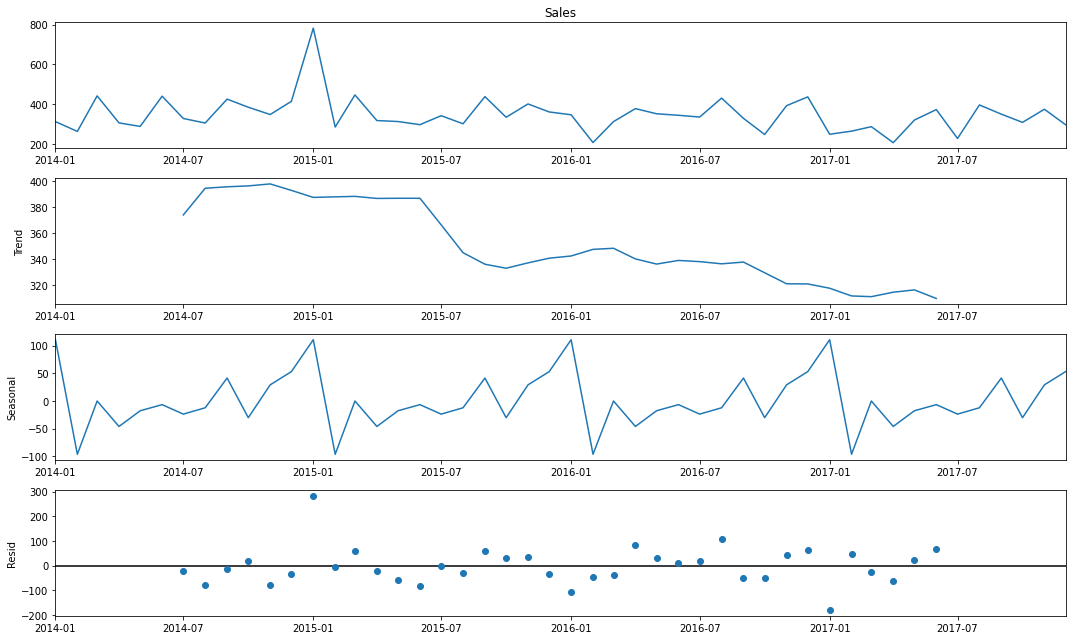

In [17]:
from pylab import rcParams
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
figure= decomposition.plot()
figure.set_size_inches((15, 9))
# Tight layout to realign things
figure.tight_layout()
plt.show()

The above graph shows that the sales of furniture is highly unsatble with seasonality and trend easily observable

# Time Series forecasting with ARIMA Model
### ARIMA models are donated with the notation: ARIMA (p, d, q) where:

p denotes seasonality

d denotes trend

q denotes noise in data

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal components of the series.

### Trend Components:

p denotes Trend autoregression order

d denotes Trend difference order

q denotes Trend moving average order

### Seasonality Components:
p denotes Seasonal autoregressive order.

d denotes Seasonal difference order.

q denotes Seasonal moving average order.

m denotes the number of time steps for a single seasonal period.

In [18]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:702.6705312928079
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2203.0774285025527
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:453.9753787450912
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:445.70342832932846
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:628.5073498088843
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1881.3895590613897
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:449.85654362896224
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:447.6654317244581
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:668.1480179335417
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1121.3234647235333
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:455.4607930399266
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:447.6052341733082
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:623.164514287966
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1738.5205177280936
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:451.79486304204517
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:449.54564413988464
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:592.3531323020952
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2260.8833200566505
AR

In [20]:
model  = sm.tsa.statespace.SARIMAX(y, order = (0,1,1), seasonal_order=(1,1,1,12),enforce_stationarity= False, enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.458     -2.182      0.029      -1.898      -0.102
ar.S.L12      -0.0016      0.265     -0.006      0.995      -0.521       0.518
ma.S.L12      -0.0121      0.323     -0.037      0.970      -0.645       0.620
sigma2      6616.1045   6.93e-05   9.55e+07      0.000    6616.104    6616.105


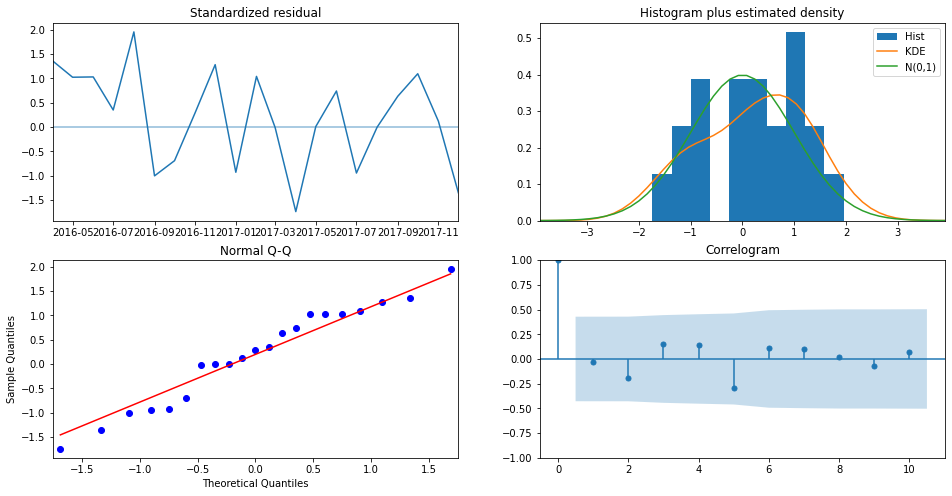

In [21]:
results.plot_diagnostics(figsize = (16,8))
plt.show()

The above plots suggest that the Model Residuals are nearly Normally Distributed.

### Validating the model forecasts
To validate the model results, we compare the actual sales with the predicted sales of the time series data starting from 2017/01/01 till the end of the data.

            lower Sales  upper Sales
Order Date                          
2017-01-01   162.993208   488.807874
2017-02-01    15.069540   340.594026
2017-03-01   125.091933   450.347701
2017-04-01   187.772570   512.780405
2017-05-01   156.889286   481.667650
2017-06-01   149.274711   473.840078
2017-07-01   143.354849   467.721980
2017-08-01   234.302210   558.484383
2017-09-01   135.661291   459.670494
2017-10-01    55.965134   379.812224
2017-11-01   202.766714   526.461560
2017-12-01   246.243554   569.795147


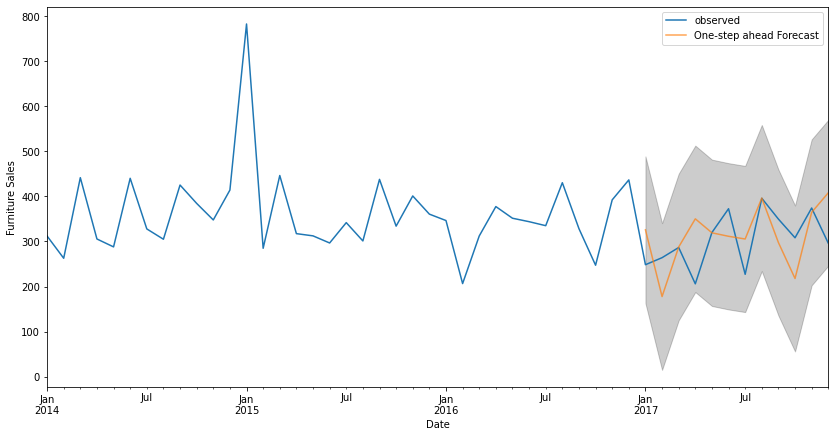

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values alligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [23]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 5630.466


In [24]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 75.03643135023727


### Future Forecasts

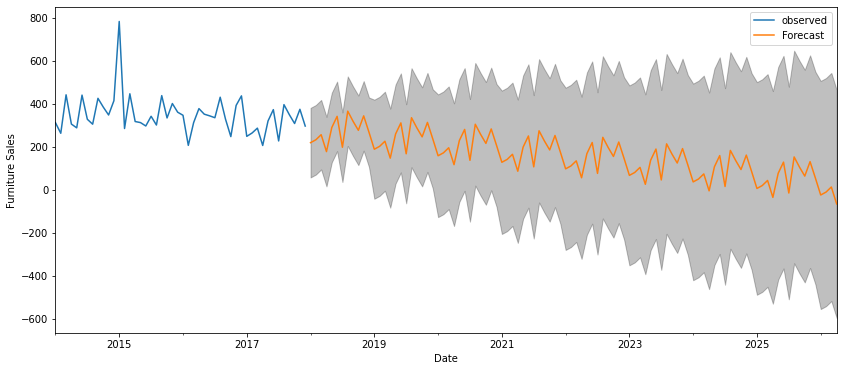

In [25]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Here, note that the confidence interval is increasing as we move further into the future. The model becomes less confident in predicting the values as we move ahead.

Our data has 3 categories: 'Furniture', 'Office Supplies' and, 'Technology'. Let's compare the 'Furniture' and 'Office Supplies' time series.

### Furniture vs Office Supplies

In [26]:
furniture = df1.loc[df1['Category'] == 'Furniture']
office = df1.loc[df1['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [27]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

 Now, let's merge both the time series for comparison

In [28]:
store = furniture.merge(office, on='Order Date', how='inner')
store.rename(columns={'Sales_x': 'Furniture Sales', 'Sales_y': 'Office Sales'}, inplace=True)
store.head()

,Order Date,Furniture Sales,Office Sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


# Visualizing Furniture vs Office Sales time series

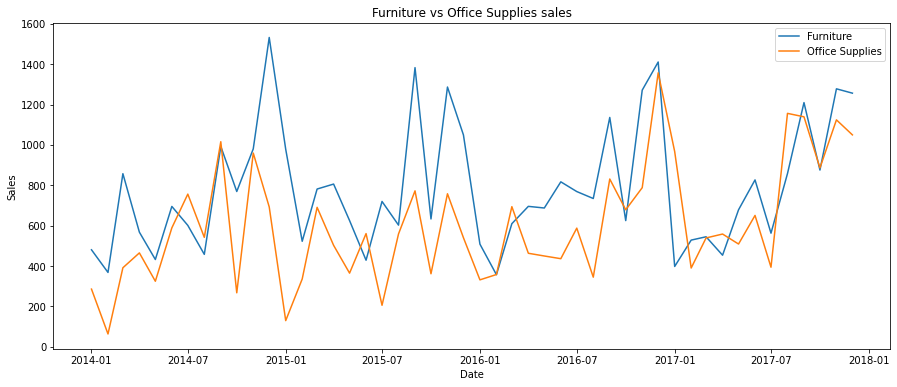

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['Furniture Sales'], label='Furniture')
plt.plot(store['Order Date'], store['Office Sales'], label='Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies sales')
plt.legend()

## Few Observations:
The above plot clearly shows that both furniture and office supplies exhibit similar seasonality component.
The sales are generally low at the beginning of every year as evident from decreasing line slope at the onset of year 2014, 2015, 2016 etc.
Also, monthly average sales of furniture is higher than that of office supplies. It's probably because cost of furniture is much more as compared to office utilities.
But there are few instances in the time series where office supply sales surpass furniture. It is mainly in July 2014 for the first time in the dataset.